In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [6]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [7]:
from tueplots import bundles
plt.rcParams.update(bundles.icml2022())

# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'


/home/nipun.batra/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


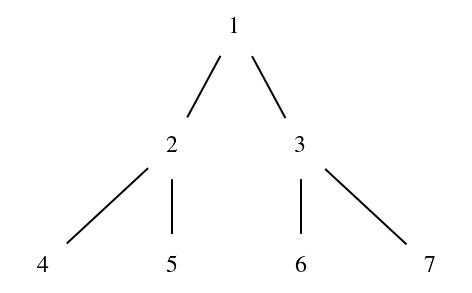

In [9]:
# Create a simple binary tree in networkx and plot it with dot layout

# +
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='white')

/tmp/ipykernel_2537678/3260582450.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


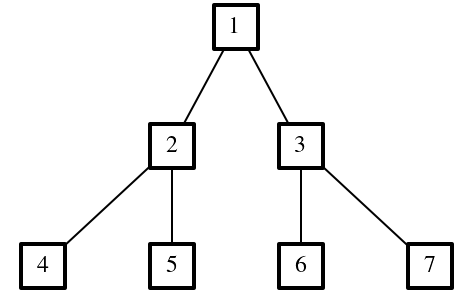

In [24]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='white', node_shape='s', edgecolors='black', linewidths=2)
# Show circle around root node
plt.tight_layout()

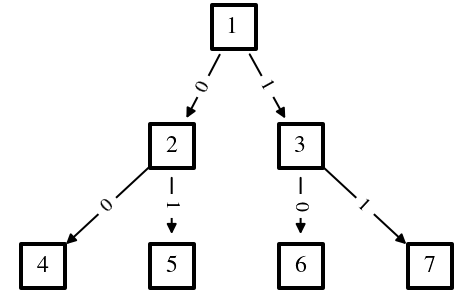

In [58]:
# Edges have string labels
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2, {'label': '0'}), (1, 3, {'label': '1'}), (2, 4, {'label': '0'}), (2, 5, {'label': '1'}), (3, 6, {'label': '0'}), (3, 7, {'label': '1'})])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='white', node_shape='s', edgecolors='black', linewidths=2)

# Print edge labels
labels = nx.get_edge_attributes(G, 'label')
_ = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)




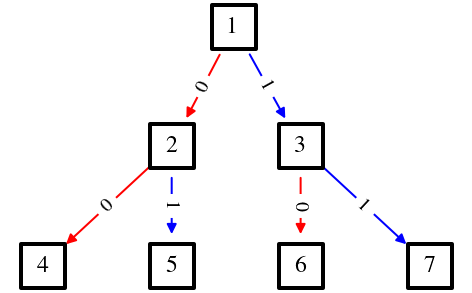

In [60]:
# Colour 0 edges red and 1 edges blue
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2, {'label': '0'}), (1, 3, {'label': '1'}), (2, 4, {'label': '0'}), (2, 5, {'label': '1'}), (3, 6, {'label': '0'}), (3, 7, {'label': '1'})])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
#nx.draw(G, pos, with_labels=True, node_size=500, node_color='white', node_shape='s', edgecolors='black', linewidths=2)

# Print edge labels
labels = nx.get_edge_attributes(G, 'label')
edge_colors = ['red' if label == '0' else 'blue' for label in labels.values()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color='white', node_shape='s', edgecolors='black', linewidths=2, edge_color=edge_colors)

_ = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)



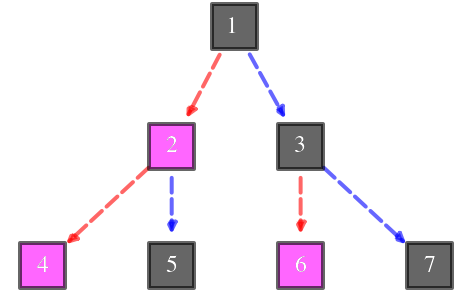

In [71]:
# Colour odd nodes as black and even nodes as magenta with alpha=0.2
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2, {'label': '0'}), (1, 3, {'label': '1'}), (2, 4, {'label': '0'}), (2, 5, {'label': '1'}), (3, 6, {'label': '0'}), (3, 7, {'label': '1'})])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Print edge labels
labels = nx.get_edge_attributes(G, 'label')
edge_colors = ['red' if label == '0' else 'blue' for label in labels.values()]
node_colors = ['black' if node % 2 == 1 else 'magenta' for node in G.nodes]

#nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, node_shape='s', edgecolors='black', linewidths=2, edge_color=edge_colors, alpha=0.6)


# Make edge lines dashed and weight 2
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, node_shape='s',
         edgecolors='black', linewidths=2, edge_color=edge_colors, alpha=0.6, style='dashed', width=2)

# Make text labels white

_ = nx.draw_networkx_labels(G, pos, font_color='white')

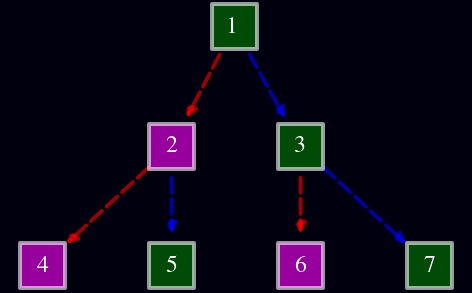

In [83]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2, {'label': '0'}), (1, 3, {'label': '1'}), (2, 4, {'label': '0'}), (2, 5, {'label': '1'}), (3, 6, {'label': '0'}), (3, 7, {'label': '1'})])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Print edge labels
labels = nx.get_edge_attributes(G, 'label')
edge_colors = ['red' if label == '0' else 'blue' for label in labels.values()]
node_colors = ['green' if node % 2 == 1 else 'magenta' for node in G.nodes]

fig = plt.figure()
# Make edge lines dashed and weight 2
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, node_shape='s',
        edgecolors='white', linewidths=2, edge_color=edge_colors, alpha=0.6, style='dashed', width=2)

fig.set_facecolor("#00000F")

# Make text labels white
_ = nx.draw_networkx_labels(G, pos, font_color='white')



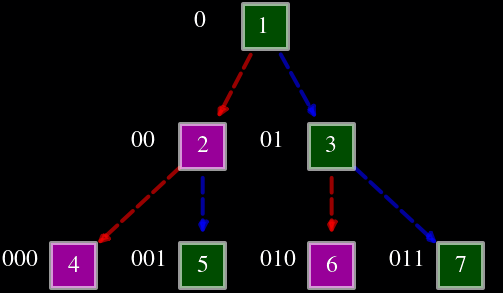

In [101]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2, {'label': '0'}), (1, 3, {'label': '1'}), (2, 4, {'label': '0'}), (2, 5, {'label': '1'}), (3, 6, {'label': '0'}), (3, 7, {'label': '1'})])

pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

# Print edge labels
labels = nx.get_edge_attributes(G, 'label')
edge_colors = ['red' if label == '0' else 'blue' for label in labels.values()]
node_colors = ['green' if node % 2 == 1 else 'magenta' for node in G.nodes]

fig = plt.figure()
# Make edge lines dashed and weight 2
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, node_shape='s',
        edgecolors='white', linewidths=2, edge_color=edge_colors, alpha=0.6, style='dashed', width=2)

fig.set_facecolor("#000001")



# Make text labels white
_ = nx.draw_networkx_labels(G, pos, font_color='white')

# Put coding for each node. Each red appends 0 and each blue appends 1
# codings[1] = '0'
# codings[2] = '00'
# codings[3] = '01'
# codings[4] = '000' and so on

codings = {}
codings[1] = '0'
codings[2] = '00'
codings[3] = '01'
codings[4] = '000'
codings[5] = '001'
codings[6] = '010'
codings[7] = '011'

# Put codings on the left of each node in white
for node, coding in codings.items():
    plt.text(pos[node][0] - 40, pos[node][1], coding, color='white', fontsize=12)
